# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#### Other hypotheses:
1. Applicants with larger dependents are less likely to get a loan
2. Married applicants are more likely to get a loan

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [333]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/data.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.drop(columns=['Loan_ID', 'Gender'], inplace=True);
df.head()
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [5]:
df['Credit_History'].value_counts()
df['Credit_History'] = df['Credit_History'].astype('category')

In [6]:
# separate cat and numerical cols
cat_cols = df.columns[df.dtypes=='object'].to_list()
df[cat_cols] = df[cat_cols].astype('category')
cat_cols.append('Credit_History')
num_cols = set(df.columns) - set(cat_cols)

### Visualizing the distributions of continous values

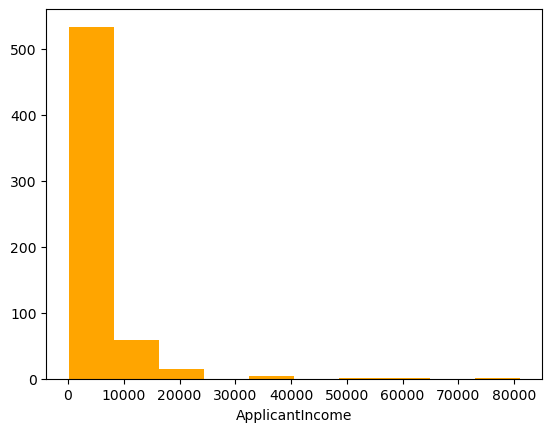

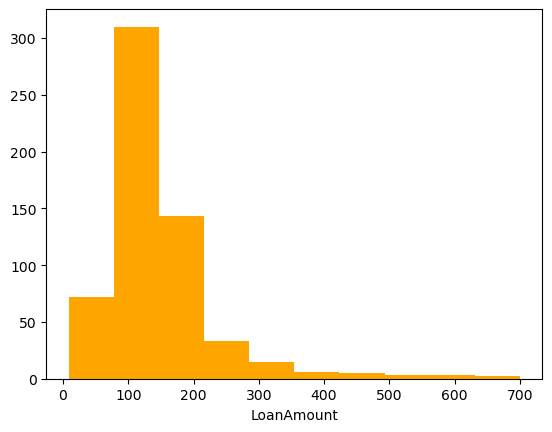

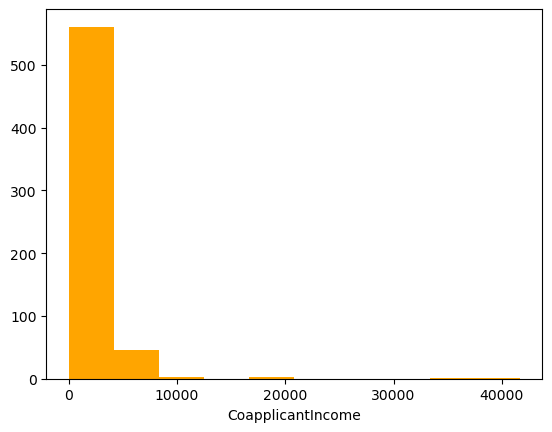

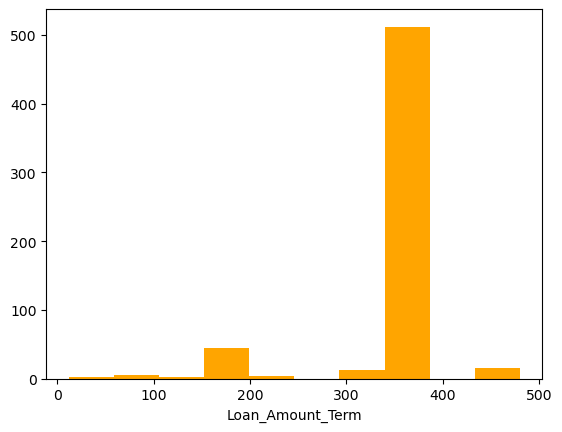

In [7]:
for col in num_cols:
    plt.hist(df[col], label=col, color='orange')
    plt.xlabel(col)
    plt.show()
    

**Observation**: Loan amount and both incomes are left-skewed. Loan amount terms is right skewed, with most of its value falling betwewen 350-400.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [8]:
for col in cat_cols:
    print (col, df[col].nunique())

Married 2
Dependents 4
Education 2
Self_Employed 2
Property_Area 3
Loan_Status 2
Credit_History 2


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

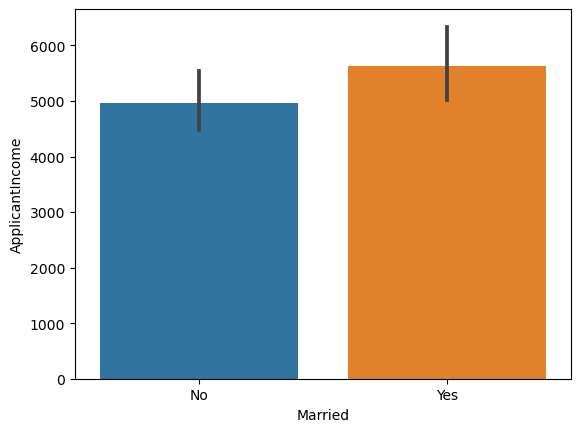

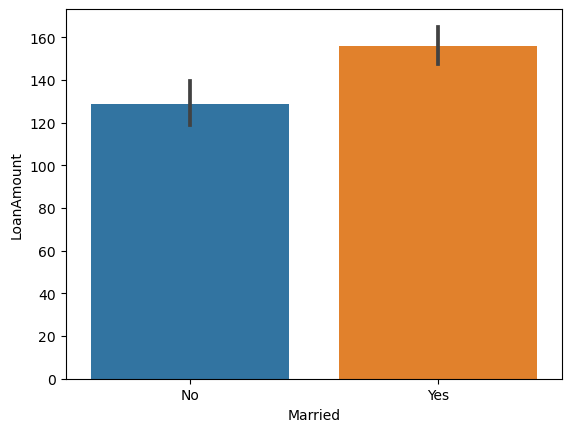

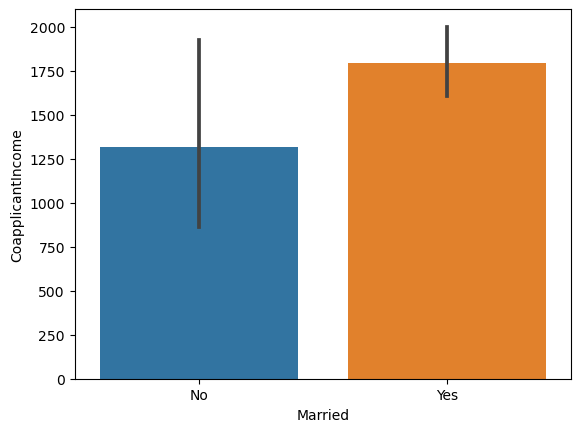

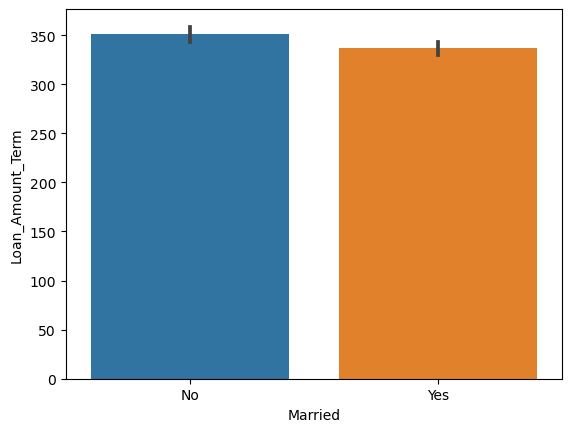

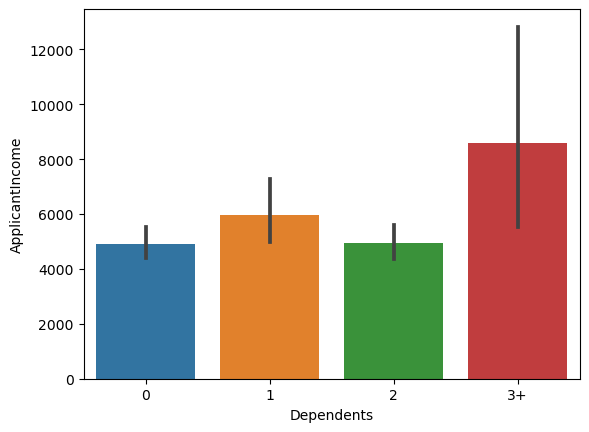

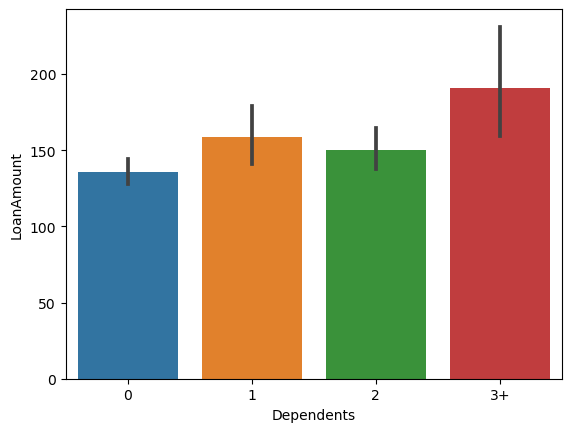

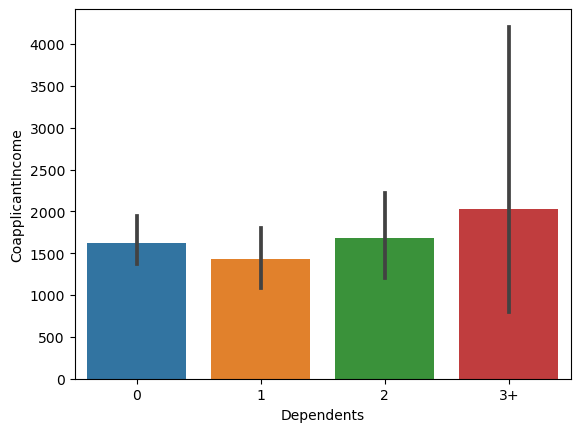

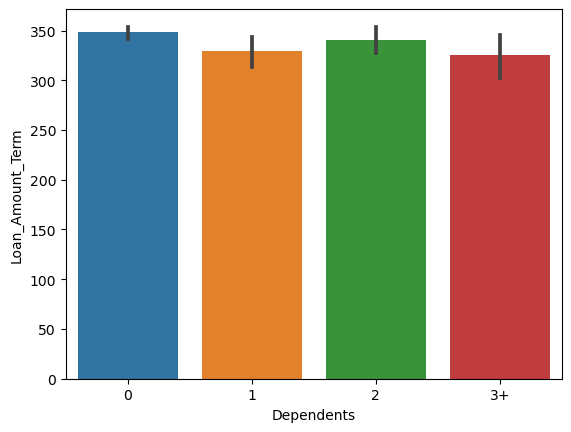

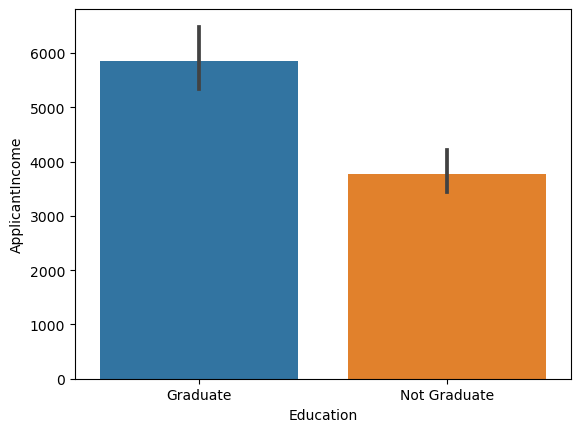

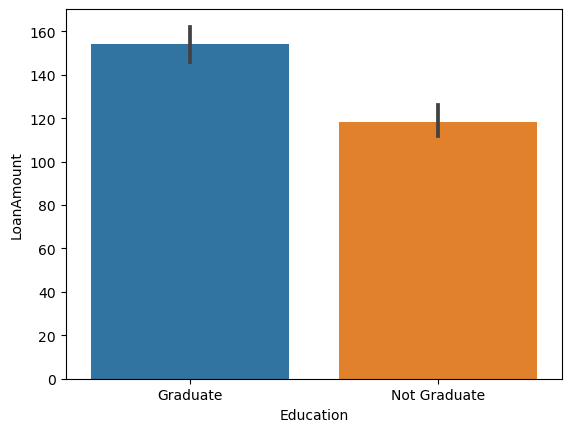

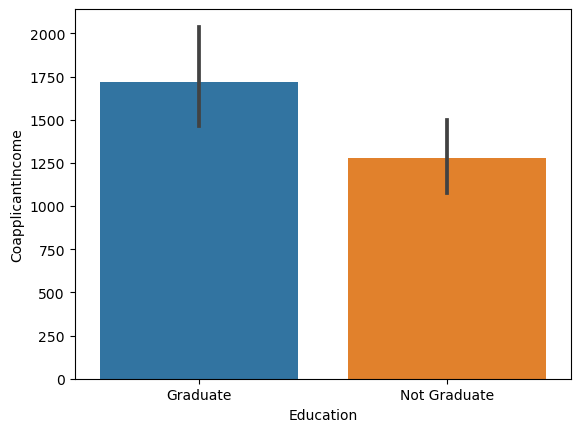

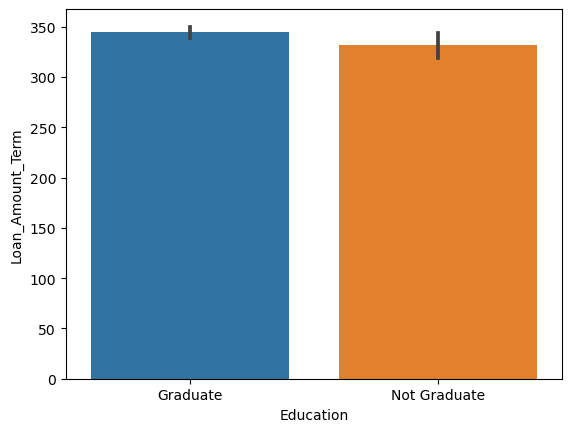

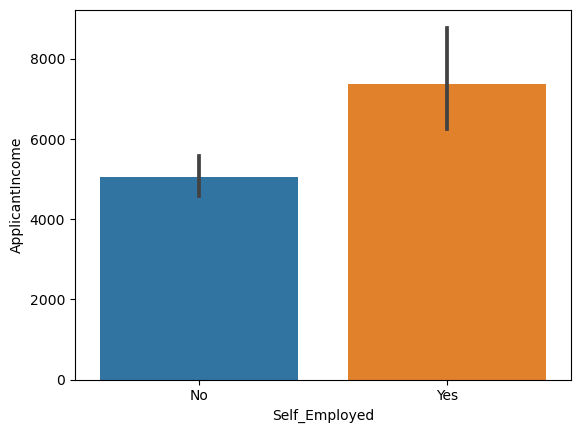

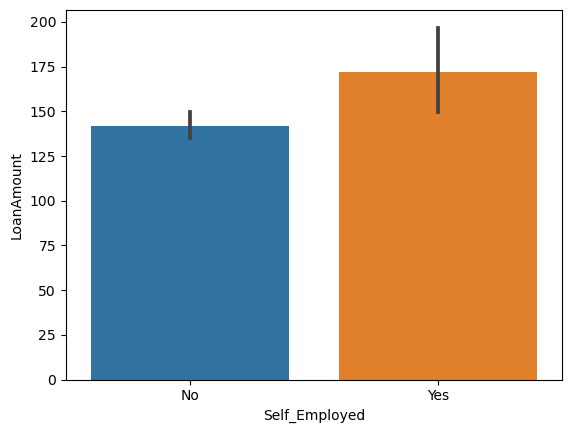

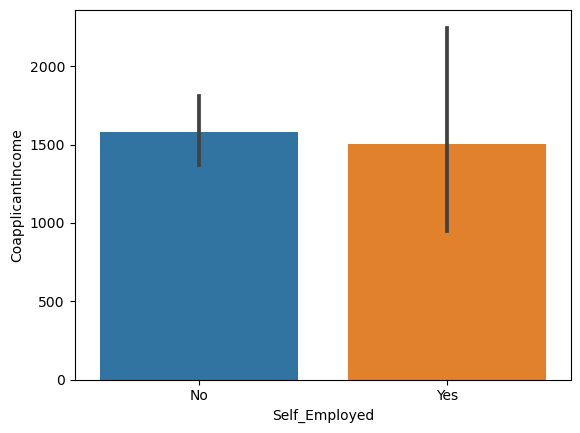

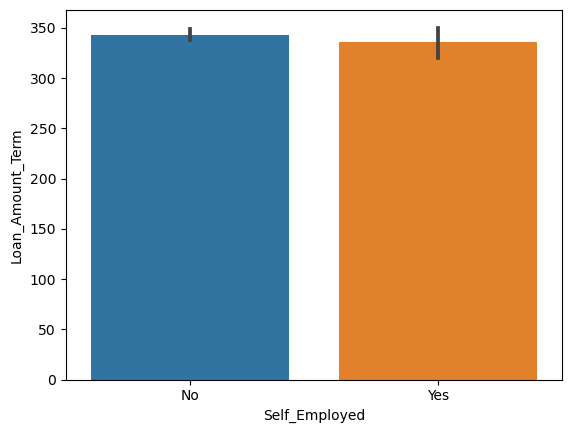

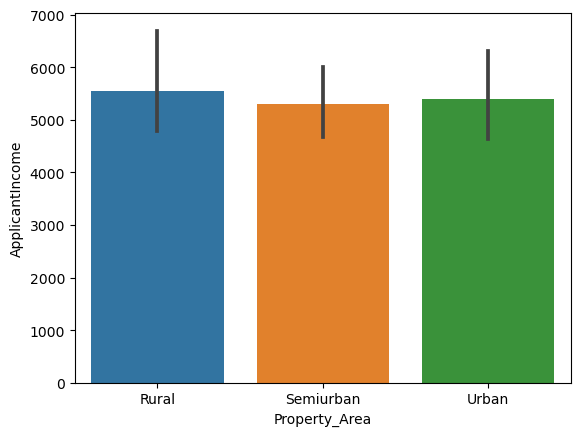

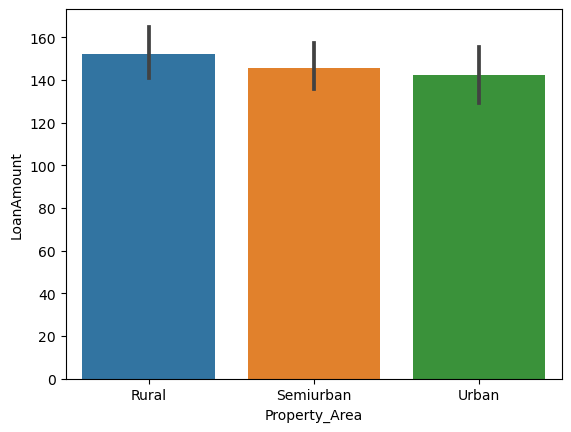

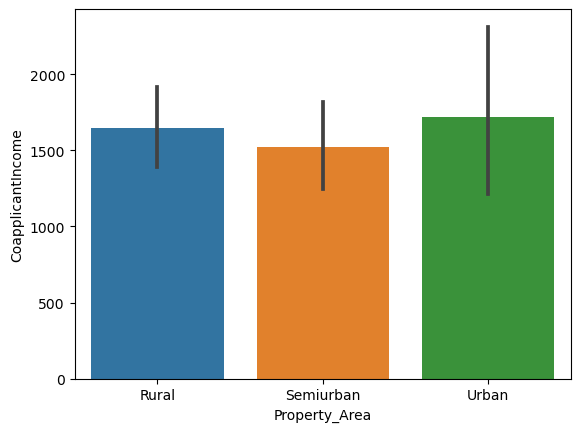

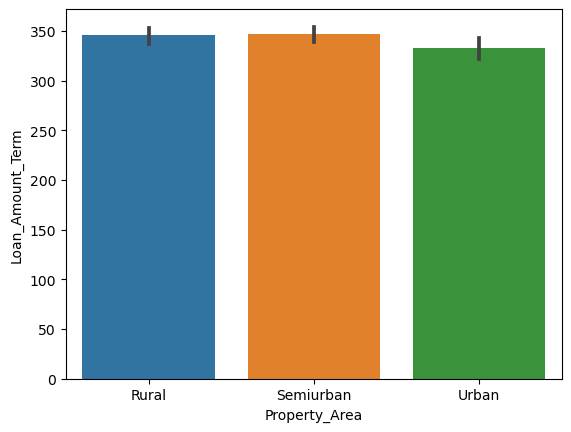

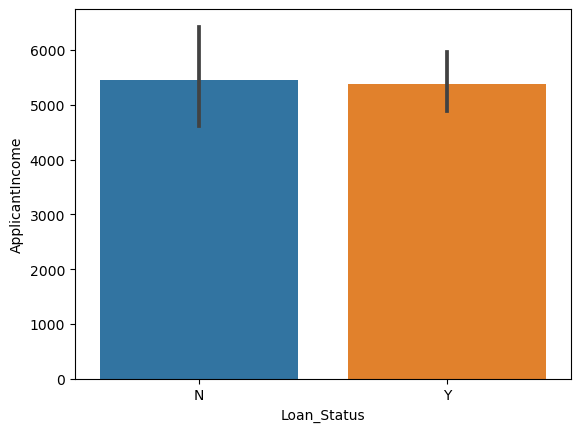

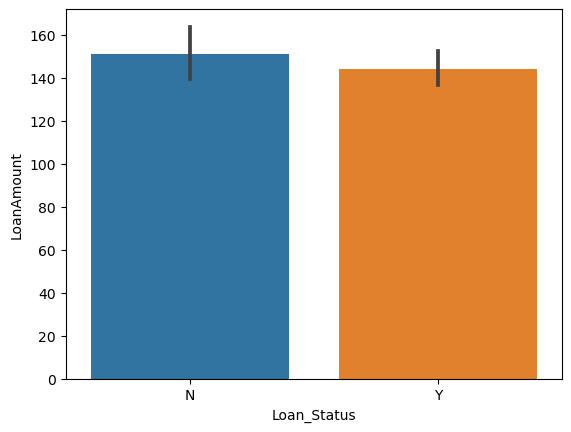

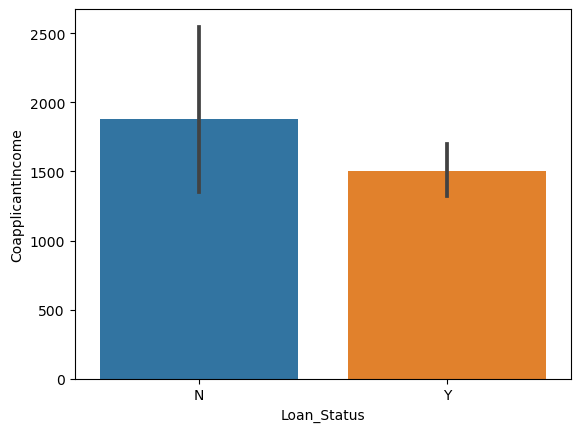

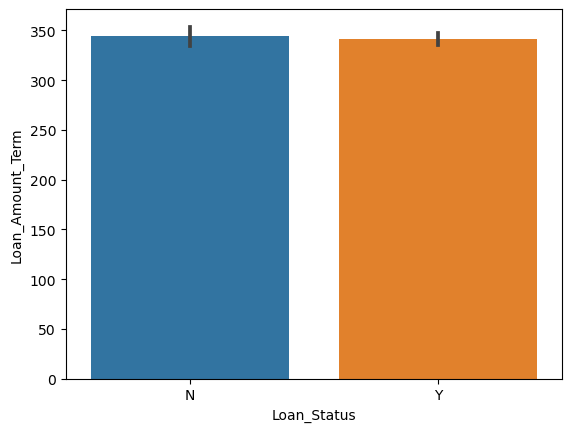

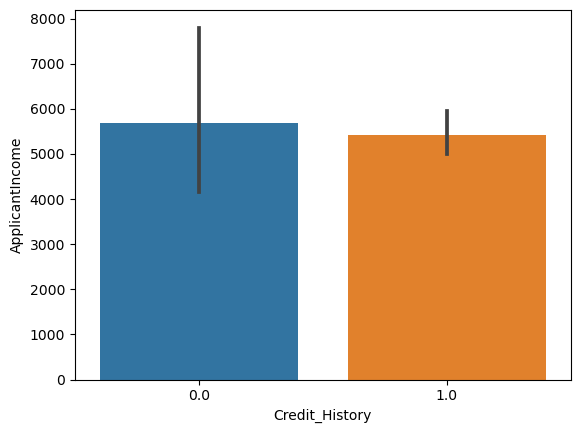

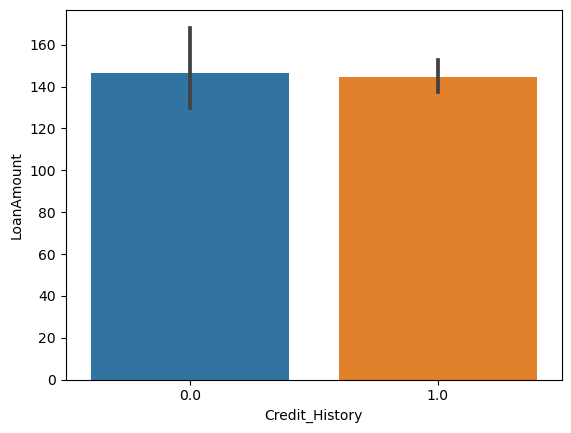

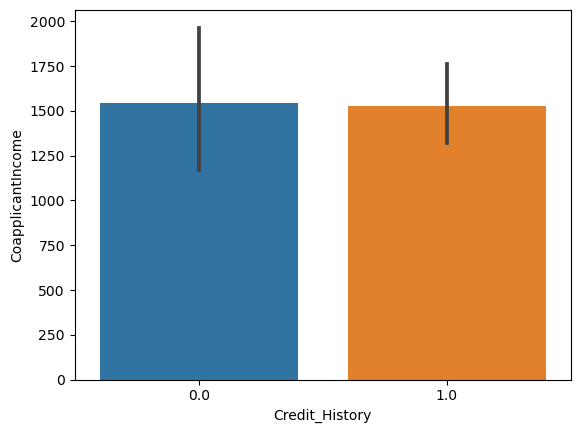

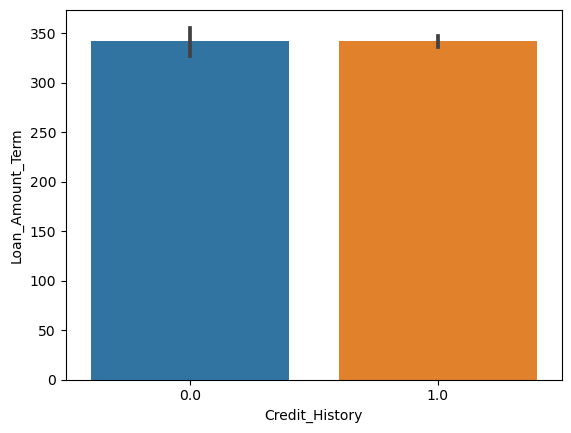

In [13]:
for cat in cat_cols:
    for num in num_cols:
        sns.barplot(data=df, x=cat, y=num)
        plt.show()


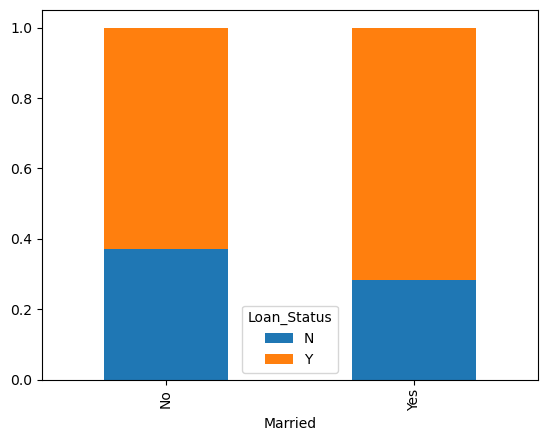

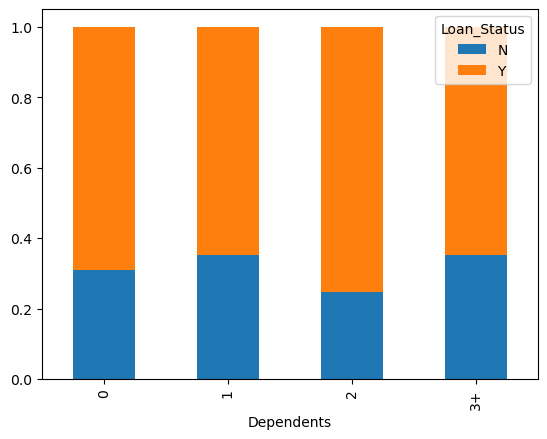

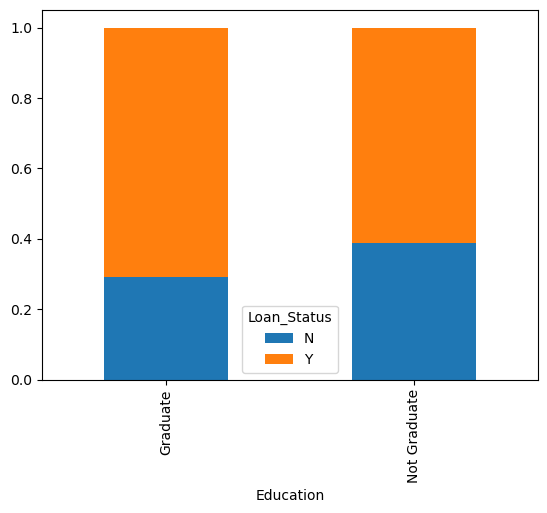

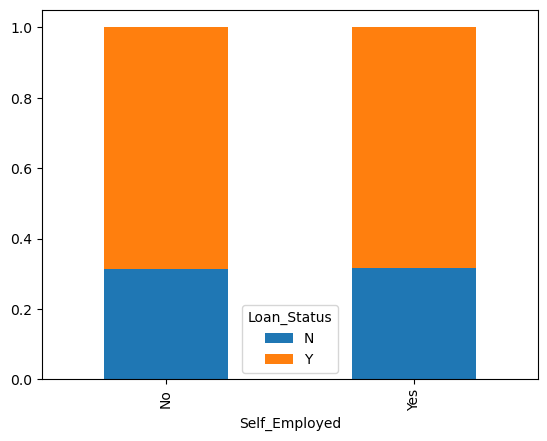

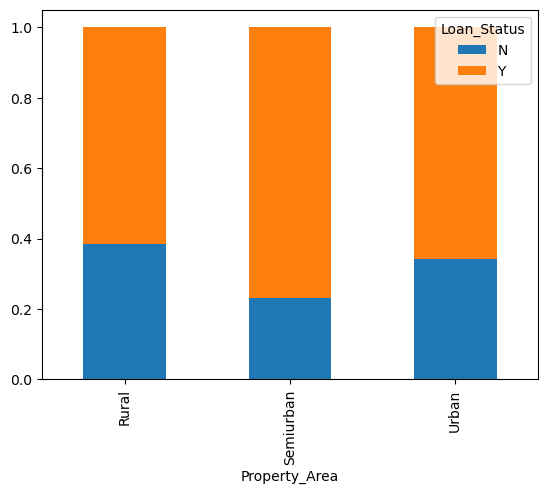

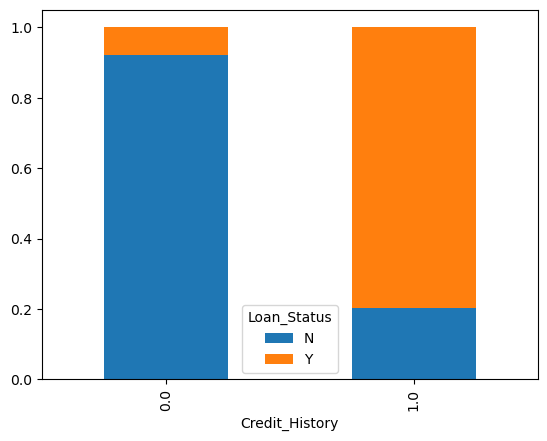

In [14]:
for col in cat_cols:
    if col=='Loan_Status':
        continue
    pd.crosstab(df[col], 
                df['Loan_Status'],
                normalize='index').plot.bar(stacked=True)
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



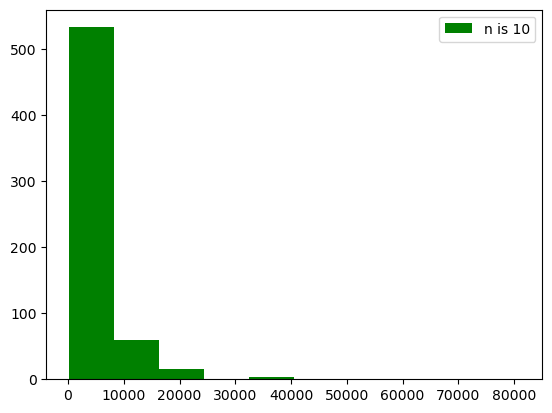

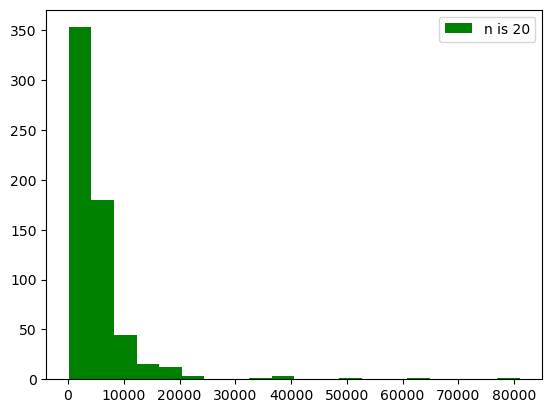

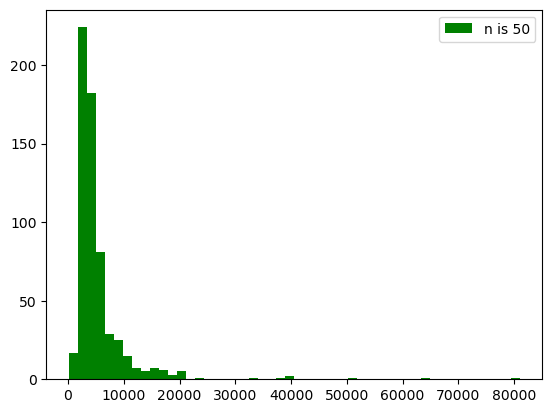

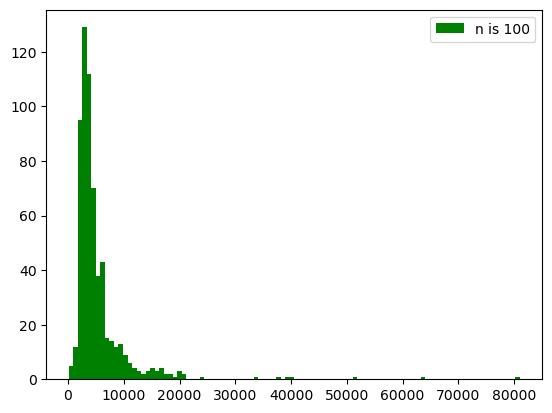

In [16]:
for bin_size in [10, 20, 50,100]:
    plt.hist(df['ApplicantIncome'], bins=bin_size, label=f"n is {bin_size}", color='green');
    plt.legend()
    plt.show();


Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

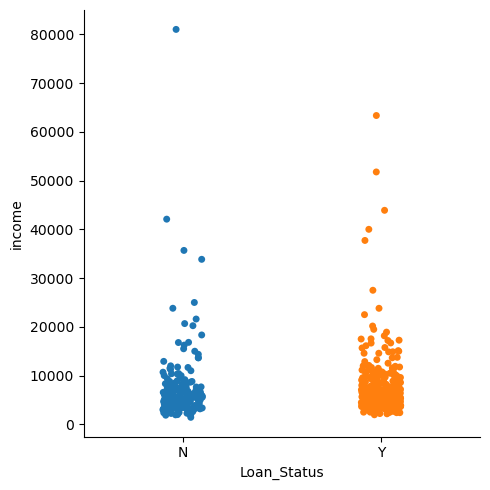

In [355]:
df['income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.catplot(data=df, x="Loan_Status", y='income', hue='Loan_Status')

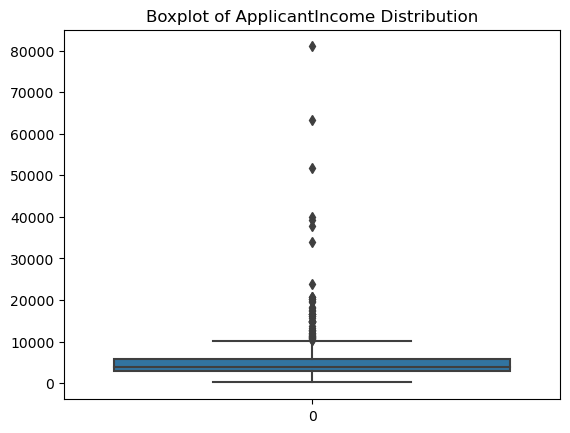

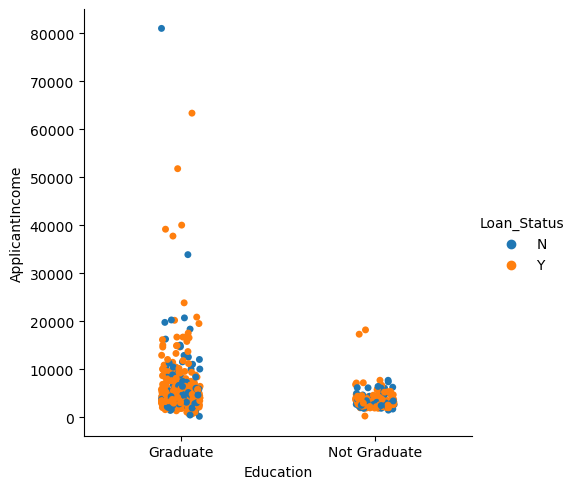

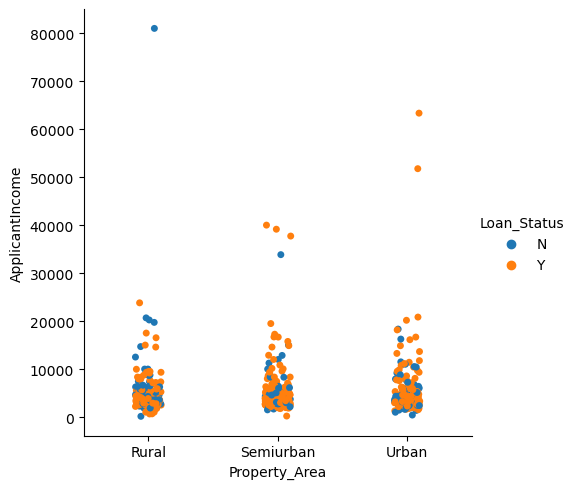

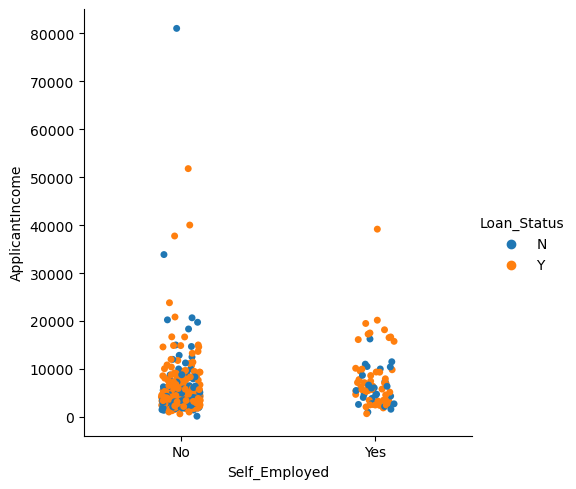

In [17]:
def distribution_analysis(col):
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} Distribution')
    plt.show()
    sns.catplot(data=df, x="Education", y=col, hue="Loan_Status")
    sns.catplot(data=df, x="Property_Area", y=col, hue="Loan_Status")
    sns.catplot(data=df, x="Self_Employed", y=col, hue="Loan_Status")    
distribution_analysis('ApplicantIncome')

Look at the histogram and boxplot of LoanAmount

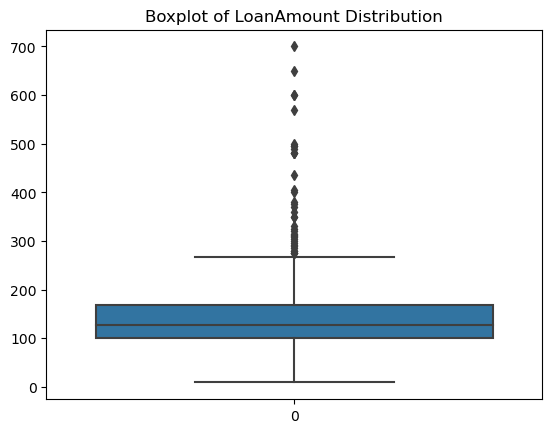

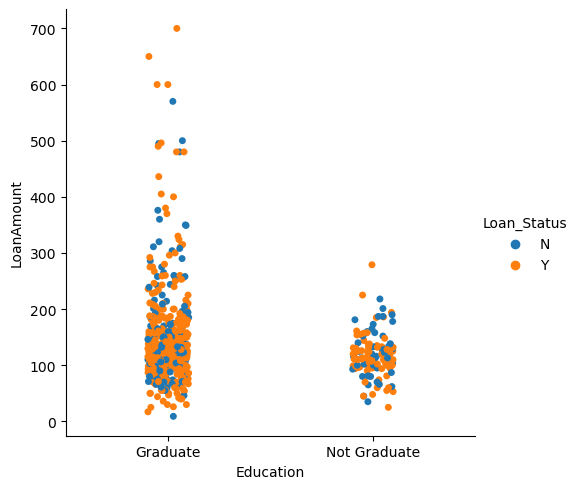

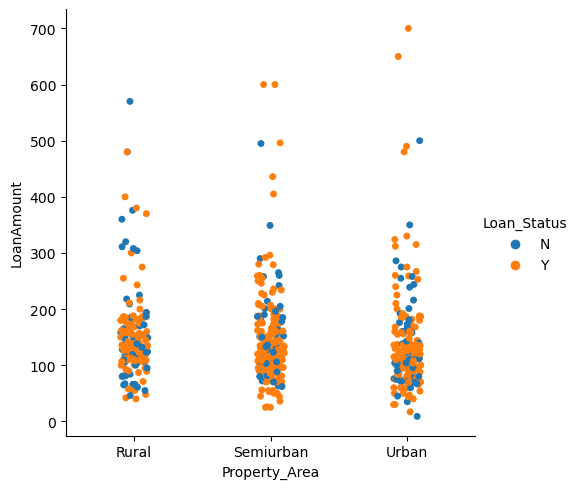

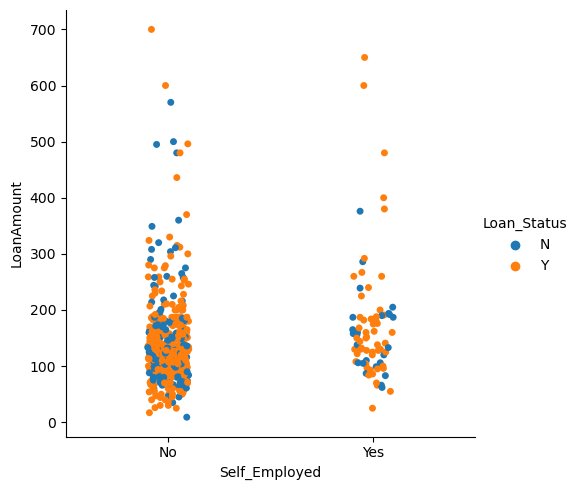

In [18]:
distribution_analysis('LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [19]:
filter = df['ApplicantIncome'] > 30000
df[filter]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            611 non-null    category
 1   Dependents         599 non-null    category
 2   Education          614 non-null    category
 3   Self_Employed      582 non-null    category
 4   ApplicantIncome    614 non-null    int64   
 5   CoapplicantIncome  614 non-null    float64 
 6   LoanAmount         592 non-null    float64 
 7   Loan_Amount_Term   600 non-null    float64 
 8   Credit_History     564 non-null    category
 9   Property_Area      614 non-null    category
 10  Loan_Status        614 non-null    category
dtypes: category(7), float64(3), int64(1)
memory usage: 24.4 KB


### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [ ]:
df.pivot_table()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [21]:
old_df = df.copy() # saving the orignal df as a backup
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            611 non-null    category
 1   Dependents         599 non-null    category
 2   Education          614 non-null    category
 3   Self_Employed      582 non-null    category
 4   ApplicantIncome    614 non-null    int64   
 5   CoapplicantIncome  614 non-null    float64 
 6   LoanAmount         592 non-null    float64 
 7   Loan_Amount_Term   600 non-null    float64 
 8   Credit_History     564 non-null    category
 9   Property_Area      614 non-null    category
 10  Loan_Status        614 non-null    category
dtypes: category(7), float64(3), int64(1)
memory usage: 24.4 KB


In [65]:
# df = old_df.copy() to restore from backup

In [422]:
# replacing with 'default' values, assuming NaN means 'does not apply' or no
values = {'Married': 'No',
          'Dependents': '0', 
          'Credit_History': 0}
df.fillna(value=values, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            614 non-null    category
 1   Dependents         614 non-null    category
 2   Education          614 non-null    category
 3   Self_Employed      582 non-null    category
 4   ApplicantIncome    614 non-null    int64   
 5   CoapplicantIncome  614 non-null    float64 
 6   LoanAmount         592 non-null    float64 
 7   Loan_Amount_Term   600 non-null    float64 
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    category
 10  Loan_Status        614 non-null    category
dtypes: category(7), float64(3), int64(1)
memory usage: 24.4 KB


In [423]:
# replacing self_employed missing values based on income level
self_employed_median_income = df.groupby('Self_Employed')['ApplicantIncome'].median()
self_employed_median_income
filter = df['Self_Employed'].isna()
for idx in df[filter].index:
    # find the nearest average
    if np.abs(self_employed_median_income - df.loc[idx,'ApplicantIncome']).argmin():
        df.loc[idx,'Self_Employed'] = 'Yes'
    else:
        df.loc[idx,'Self_Employed'] = 'No'
    
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            614 non-null    category
 1   Dependents         614 non-null    category
 2   Education          614 non-null    category
 3   Self_Employed      614 non-null    category
 4   ApplicantIncome    614 non-null    int64   
 5   CoapplicantIncome  614 non-null    float64 
 6   LoanAmount         592 non-null    float64 
 7   Loan_Amount_Term   600 non-null    float64 
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    category
 10  Loan_Status        614 non-null    category
dtypes: category(7), float64(3), int64(1)
memory usage: 24.4 KB


In [424]:
# replacing LoanAmount and Loan_Amount_Term with median and mode values respectively
df.fillna({'LoanAmount': df['LoanAmount'].mean()}, inplace=True)
df.fillna({'Loan_Amount_Term': df['Loan_Amount_Term'].mode()[0]}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            614 non-null    category
 1   Dependents         614 non-null    category
 2   Education          614 non-null    category
 3   Self_Employed      614 non-null    category
 4   ApplicantIncome    614 non-null    int64   
 5   CoapplicantIncome  614 non-null    float64 
 6   LoanAmount         614 non-null    float64 
 7   Loan_Amount_Term   614 non-null    float64 
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    category
 10  Loan_Status        614 non-null    category
dtypes: category(7), float64(3), int64(1)
memory usage: 24.4 KB


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

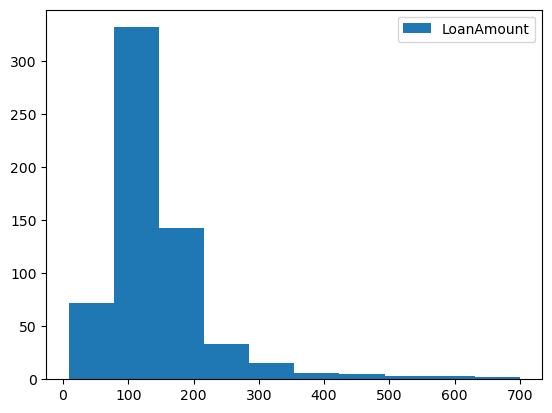

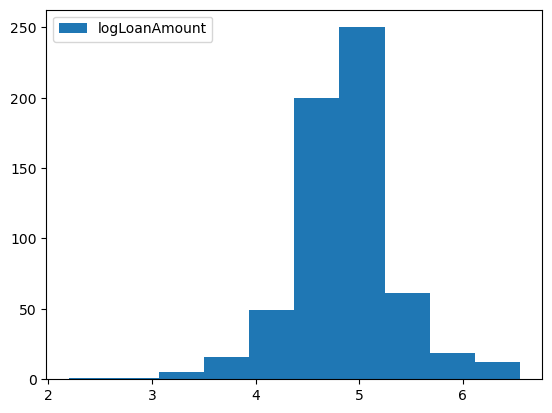

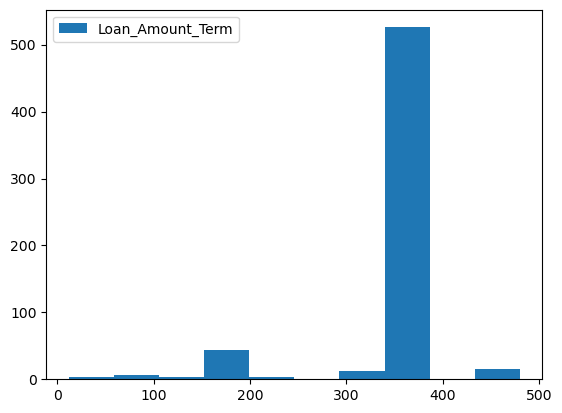

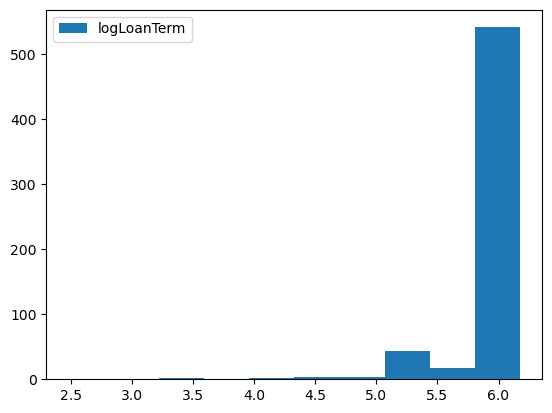

In [425]:
df['logLoanAmount'] = np.log(df['LoanAmount'])
plt.hist(df['LoanAmount'], label='LoanAmount')
plt.legend()
plt.show()
plt.hist(df['logLoanAmount'], label='logLoanAmount')
plt.legend()
plt.show()


plt.hist(df['Loan_Amount_Term'], label='Loan_Amount_Term')
plt.legend()
plt.show()
df['logLoanTerm'] = np.log(df['Loan_Amount_Term'])
plt.hist(df['logLoanTerm'], label='logLoanTerm')
plt.legend()
plt.show()

Combine both incomes as total income and take a log transformation of the same.

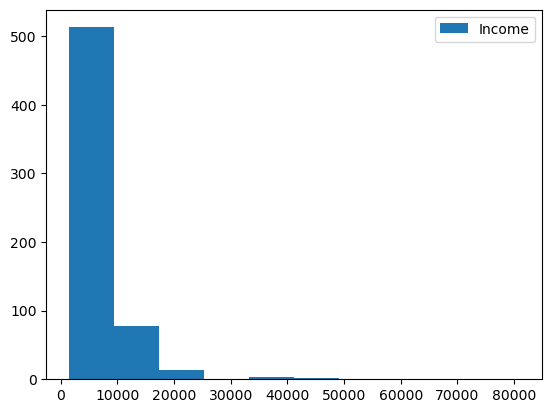

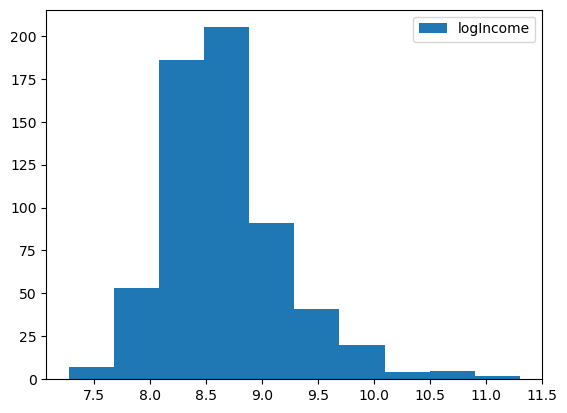

In [426]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['logIncome'] = np.log(df['Income'])

plt.hist(df['Income'], label='Income')
plt.legend()
plt.show()
plt.hist(df['logIncome'], label='logIncome')
plt.legend()
plt.show()

In [427]:
df = df.drop(columns=['Income', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Married           614 non-null    category
 1   Dependents        614 non-null    category
 2   Education         614 non-null    category
 3   Self_Employed     614 non-null    category
 4   Loan_Amount_Term  614 non-null    float64 
 5   Credit_History    614 non-null    category
 6   Property_Area     614 non-null    category
 7   Loan_Status       614 non-null    category
 8   logLoanAmount     614 non-null    float64 
 9   logLoanTerm       614 non-null    float64 
 10  logIncome         614 non-null    float64 
dtypes: category(7), float64(4)
memory usage: 24.4 KB


## 4. Building a Predictive Model

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # for dependents, property area
import category_encoders as ce

In [429]:
# separate label from features
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)



In [430]:
X_train.head()

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,logLoanAmount,logLoanTerm,logIncome
341,No,0,Graduate,No,360.0,1.0,Rural,3.828641,5.886104,7.774015
344,Yes,2,Graduate,No,360.0,1.0,Rural,4.828314,5.886104,8.499640
598,Yes,0,Graduate,Yes,360.0,1.0,Rural,5.192957,5.886104,9.206634
70,Yes,0,Graduate,No,360.0,1.0,Urban,5.147494,5.886104,8.744169
525,Yes,2,Graduate,Yes,360.0,1.0,Rural,5.991465,5.886104,9.769956


In [431]:
## scale numerical data
scaler = StandardScaler()
X_train_nominal = X_train.select_dtypes(include=['float64'])
scaler.fit(X_train_nominal)
X_train_scaled = scaler.transform(X_train_nominal)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_nominal.columns)
X_train_scaled.head()

,Loan_Amount_Term,logLoanAmount,logLoanTerm,logIncome
0,0.265276,-2.077120,0.258245,-1.673437
1,0.265276,-0.057694,0.258245,-0.321144
2,0.265276,0.678917,0.258245,0.996428
3,0.265276,0.587079,0.258245,0.134568
4,0.265276,2.291972,0.258245,2.046251


In [432]:
## encode and scale categorical data
enc = OrdinalEncoder()
X_train_ordinal = X_train[['Dependents', 'Property_Area']]
enc.fit(X_train_ordinal)
X_train_encoded = enc.transform(X_train_ordinal)

pd.DataFrame(X_train_encoded, columns=X_train_ordinal.columns).head()



min_scaler = MinMaxScaler()
min_scaler.fit(X_train_encoded)
X_train_encoded_scaled = min_scaler.transform(X_train_encoded)
X_train_encoded_scaled = pd.DataFrame(X_train_encoded_scaled, columns=X_train_ordinal.columns)
X_train_encoded_scaled.head()


,Dependents,Property_Area
0,0.000000,0.0
1,0.666667,0.0
2,0.000000,0.0
3,0.000000,1.0
4,0.666667,0.0


In [433]:
X_train_binary_encoded.shape

(552, 10)

In [434]:
X_train_binary = X_train[['Married', 'Education', 'Self_Employed', 'Credit_History']]
binary_enc = OneHotEncoder(drop='if_binary', sparse_output=False)


binary_enc.fit(X_train_binary)

X_train_binary_encoded = binary_enc.transform(X_train_binary)


X_train_binary_encoded = pd.DataFrame(X_train_binary_encoded,
            columns=X_train_binary.columns)

X_train_binary_encoded.head()


,Married,Education,Self_Employed,Credit_History
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0


In [435]:
X_train_postprocessing = X_train_scaled.merge(X_train_binary_encoded,
    left_index=True,
    right_index=True).merge(X_train_encoded_scaled,
            left_index=True,
            right_index=True)



X_train_postprocessing.head()

,Loan_Amount_Term,logLoanAmount,logLoanTerm,logIncome,Married,Education,Self_Employed,Credit_History,Dependents,Property_Area
0,0.265276,-2.077120,0.258245,-1.673437,0.0,0.0,0.0,1.0,0.000000,0.0
1,0.265276,-0.057694,0.258245,-0.321144,1.0,0.0,0.0,1.0,0.666667,0.0
2,0.265276,0.678917,0.258245,0.996428,1.0,0.0,1.0,1.0,0.000000,0.0
3,0.265276,0.587079,0.258245,0.134568,1.0,0.0,0.0,1.0,0.000000,1.0
4,0.265276,2.291972,0.258245,2.046251,1.0,0.0,1.0,1.0,0.666667,0.0


In [436]:
# swap the names for easier coding
X_train_preprocessing = X_train.copy()
X_train = X_train_postprocessing
X_train.sample(n=10)

,Loan_Amount_Term,logLoanAmount,logLoanTerm,logIncome,Married,Education,Self_Employed,Credit_History,Dependents,Property_Area
417,0.265276,-1.608861,0.258245,-0.476107,1.0,0.0,0.0,0.0,0.000000,0.0
34,0.265276,0.440985,0.258245,0.247514,1.0,0.0,1.0,1.0,0.666667,0.5
548,-2.643976,0.261706,-2.100237,0.112456,1.0,1.0,0.0,1.0,0.000000,1.0
3,0.265276,0.587079,0.258245,0.134568,1.0,0.0,0.0,1.0,0.000000,1.0
334,0.265276,0.037015,0.258245,-0.110131,1.0,0.0,0.0,1.0,0.000000,0.5
277,0.265276,-0.226132,0.258245,-0.457241,1.0,0.0,0.0,1.0,0.000000,0.5
358,0.265276,0.830224,0.258245,0.452486,0.0,0.0,1.0,1.0,0.000000,0.0
406,0.265276,-0.315929,0.258245,0.280215,1.0,0.0,0.0,1.0,0.000000,1.0
477,0.265276,-0.549275,0.258245,-1.163150,1.0,1.0,0.0,1.0,0.666667,0.5
396,0.265276,-0.371787,0.258245,-0.697776,1.0,0.0,0.0,1.0,0.333333,0.0


In [437]:
# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

To test this model, I will have to repeat all the same steps for X_test

In [438]:
X_test

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,logLoanAmount,logLoanTerm,logIncome
231,Yes,0,Graduate,No,180.0,1.0,Rural,3.737670,5.192957,8.220403
541,No,0,Graduate,No,360.0,0.0,Semiurban,4.595120,5.886104,7.667626
233,No,0,Graduate,No,360.0,1.0,Semiurban,5.634790,5.886104,9.027979
110,No,0,Graduate,No,360.0,1.0,Urban,4.912655,5.886104,8.578476
576,Yes,0,Graduate,No,360.0,0.0,Semiurban,4.912655,5.886104,8.574896
...,...,...,...,...,...,...,...,...,...,...
467,Yes,0,Graduate,No,360.0,1.0,Semiurban,4.700480,5.886104,9.722685
446,Yes,2,Not Graduate,No,360.0,1.0,Rural,4.700480,5.886104,8.445053
221,Yes,2,Graduate,No,360.0,1.0,Semiurban,4.753590,5.886104,8.652772
451,Yes,2,Not Graduate,No,300.0,0.0,Urban,4.094345,5.703782,8.135640


In [439]:
# numerical

X_test_nominal = X_test.select_dtypes(include=['float64'])
X_test_ordinal = X_test[['Dependents', 'Property_Area']]
X_test_binary = X_test[['Married', 'Education', 'Self_Employed', 'Credit_History']]

X_test_scaled = scaler.transform(X_test_nominal)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_nominal.columns)

# categorical
## encode and scale categorical data

X_test_encoded = enc.transform(X_test_ordinal)
X_test_encoded_scaled = min_scaler.transform(X_test_encoded)
X_test_encoded_scaled = pd.DataFrame(X_test_encoded_scaled, columns=X_test_ordinal.columns)

# binary
X_test_binary_encoded = binary_enc.transform(X_test_binary)
X_test_binary_encoded = pd.DataFrame(X_test_binary_encoded,
            columns=X_test_binary.columns)


X_test_postprocessing = X_test_scaled.merge(X_test_binary_encoded,
    left_index=True,
    right_index=True).merge(X_test_encoded_scaled,
            left_index=True,
            right_index=True)


# swap the names for easier coding
X_test_preprocessing = X_test.copy()
X_test = X_test_postprocessing
X_test.sample(n=10)

model.score(X_test, y_test)


0.7903225806451613

In [441]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.64      0.44      0.52        16
           Y       0.82      0.91      0.87        46

    accuracy                           0.79        62
   macro avg       0.73      0.68      0.69        62
weighted avg       0.78      0.79      0.78        62



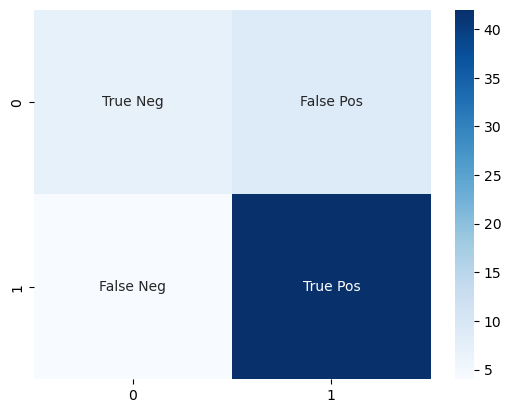

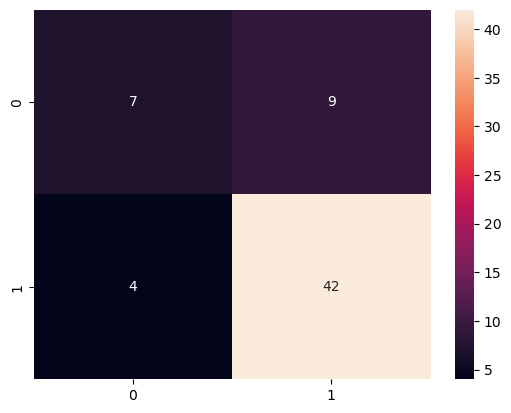

In [442]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
plt.show()

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [85]:
# visualizing pipelines
# Display HTML representation in a jupyter context
from sklearn import set_config
set_config(display='diagram')

In [352]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # for dependents, property area


from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

### Creating Custom Classes
- will need to create custom classes and functions to:
    
    - fill in missing values of the categorical data (custom class)
    - sum up the two income colums into one column (custom class)
    - log transform Loan and Income values (implemented FunctionTransformer)

In [290]:
class CustomImputer():
    def __init__(self, df):
        # dictionary of missing values
        self.defaults = {'Married': 'No',
              'Dependents': '0', 
              'Credit_History': 0}
        
        df = df[['Self_Employed', 'ApplicantIncome']]
        self.self_employed_median_income = df.groupby('Self_Employed')['ApplicantIncome'].median()   
        self.ApplicantIncome = df['ApplicantIncome']
        
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        for col in X.columns:
            if col in self.defaults.keys():
                X[col] = X[col].fillna(self.defaults[col])
            elif col == 'Self_Employed':

                # special case for 'Self_Employed' column  
                
                filter = X[col].isna()
                for idx in X[col][filter].index:
                    # find the nearest average
                    difference = self.self_employed_median_income - self.ApplicantIncome[idx]
                    # Yes if it's nearest to index 1 or No if it's not
                    X.loc[idx, col] = 'Yes' if difference.argmin() else 'No' 
        return X
 

In [291]:
# testing the CustomImputer
df_income_self_employment = old_df[['Self_Employed', 'ApplicantIncome']]
imputer__ = CustomImputer(df_income_self_employment)
test = old_df[['Married', 'Self_Employed', 'Credit_History', 'LoanAmount']].copy()
imputer__.fit(test)
imputer__.transform(test).isna().sum()

Married            0
Self_Employed      0
Credit_History     0
LoanAmount        22
dtype: int64

In [447]:
def log_transformer(X):
    X_log = np.log(X)
    return X_log

# create a class 
class IncomeGenerator():
    '''sums Applicantincome and Coapplicantincome and 
    returns as new column Income''' 
    def __init__(self):
        pass
        
    def fit(self, X=None, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['Income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
        return X
    


In [293]:
# testing the IncomeGenerator() class
X = old_df.drop(columns='Loan_Status')
income_ = IncomeGenerator()
income_.transform(X).sample(n=2)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0
165,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,6873.0


#### Building, Training and Testing Pipeline

In [449]:
# separate label from features
X = old_df.drop(columns='Loan_Status')
y = old_df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [450]:
# wrapping the function in function transformers
log_transform = FunctionTransformer(log_transformer)

# pipeline for numeric log transformations
numeric_log_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('log_transform', log_transform),
                              ('scaling', StandardScaler())])

# pipelines for numeric, binary and categorical transformations
numeric_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                              ('scaling', StandardScaler())])
binary_transform = Pipeline([('custom_impute', CustomImputer(df_income_self_employment)),
                             ('one_hot_encode', OneHotEncoder(drop='if_binary', sparse_output=False))])
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('ordinal_encode', OrdinalEncoder()),
                                  ('scaling', MinMaxScaler())])

# putting the pipelines above into a column transformer
preprocessing = ColumnTransformer([
    ('numeric_log', numeric_log_transform, ['LoanAmount', 'Income']),
    ('numeric', numeric_transform, ['Loan_Amount_Term']),
    ('categorical', categorical_transform, ['Dependents', 
                                            'Property_Area'
                                           ]),
    ('binary', binary_transform, ['Married', 
                                  'Self_Employed', 
                                  'Credit_History',
                                  'Education'
                                 ])
])

# throwing in features as well
feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
                              ('select_best', SelectKBest(k=3))])


# creating the final pipeline
pipe_model = Pipeline([('add_income_col', IncomeGenerator()),
                    ('preprocessing', preprocessing), 
                    ('features', feature_union),
                    ('classifier', LogisticRegression())])



# fitting the pipeline model
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('add_income_col',
                 <__main__.IncomeGenerator object at 0x7ff71e987fd0>),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric_log',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transformer at 0x7ff71e9c0ca0>)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount', 'Income']),
                                                 ('numeric',
                                                  P...
                                                  Pipeline(steps=[('custom_impute',
                                                                   <__main__.CustomImputer object at 0x7ff71e987d30>),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Education'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                                                ('select_best',
                                                 SelectKBest(k=3))])),
                ('classifier', LogisticRegression())])

In [451]:
pipe_model.score(X_test, y_test)

0.7258064516129032

In [323]:
pd.DataFrame(preprocessing.transform(IncomeGenerator().transform(X_test)),
            columns=['LoanAmount', 'Income',  'Loan_Amount_Term',
'Dependents', 'Property_Area', 'Married', 
 'Self_Employed', 'Credit_History', 'Education']).head(2)

,LoanAmount,Income,Loan_Amount_Term,Dependents,Property_Area,Married,Self_Employed,Credit_History,Education
0,0.255997,-0.174732,0.276662,0.666667,1.0,1.0,0.0,1.0,0.0
1,0.282740,0.710964,0.276662,0.333333,0.5,0.0,1.0,1.0,0.0


## Grid Search

In [350]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier


# throwing in features as well
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])


pipe = Pipeline(steps=[('add_income_col', IncomeGenerator()),
                    ('preprocessing', preprocessing), 
                    ('features', feature_union),
                    ('classifier', LogisticRegression())])

scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer(), MinMaxScaler()]
param_grid = {'classifier': [RidgeClassifier(alpha=0.1), 
                             RidgeClassifier(alpha=0.01), 
                             LogisticRegression(),
                             BernoulliNB(),
                             SVC(probability=True,
                                RandomForestClassifier(n_estimators=100),
                                RandomForestClassifier())],
              'preprocessing__numeric_log__scaling': scalers_to_test,
              'preprocessing__numeric__scaling': scalers_to_test,
              'preprocessing__categorical__scaling': scalers_to_test, 
              'features__pca__n_components': [3, 5],
              'features__select_best__k': [0, 3, 6, 9]
             }


grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)

In [357]:
grid.best_estimator_

Pipeline(steps=[('add_income_col',
                 <__main__.IncomeGenerator object at 0x7ff71c21c520>),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric_log',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transformer at 0x7ff719bec4c0>)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount', 'Income']),
                                                 ('numeric',
                                                  P...
                                                  Pipeline(steps=[('custom_impute',
                                                                   <__main__.CustomImputer object at 0x7ff71c21c2e0>),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Education'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('select_best',
                                                 SelectKBest(k=9))])),
                ('classifier', BernoulliNB())])

In [358]:
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.9193548387096774
Achieved with hyperparameters: {'classifier': BernoulliNB(), 'features__pca__n_components': 5, 'features__select_best__k': 9, 'preprocessing__categorical__scaling': StandardScaler(), 'preprocessing__numeric__scaling': StandardScaler(), 'preprocessing__numeric_log__scaling': StandardScaler()}


In [334]:
from sklearn.metrics import classification_report
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.85      0.79      0.81        14
           Y       0.94      0.96      0.95        48

    accuracy                           0.92        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.92      0.92      0.92        62



**Tested the best perfoming model against RandomForestClassifier()**

In [359]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier


# throwing in features as well
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])


pipe = Pipeline(steps=[('add_income_col', IncomeGenerator()),
                    ('preprocessing', preprocessing), 
                    ('features', feature_union),
                    ('classifier', RandomForestClassifier())])

scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer(), MinMaxScaler()]
param_grid = {
              'preprocessing__numeric_log__scaling': scalers_to_test,
              'preprocessing__numeric__scaling': scalers_to_test,
              'preprocessing__categorical__scaling': scalers_to_test, 
              'features__pca__n_components': [0, 3],
              'features__select_best__k': [0, 9]
             }


grid = GridSearchCV(pipe, param_grid = param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)

In [364]:
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.9193548387096774
Achieved with hyperparameters: {'features__pca__n_components': 0, 'features__select_best__k': 3, 'preprocessing__categorical__scaling': StandardScaler(), 'preprocessing__numeric__scaling': StandardScaler(), 'preprocessing__numeric_log__scaling': StandardScaler()}


In [365]:
grid.best_estimator_

Pipeline(steps=[('add_income_col',
                 <__main__.IncomeGenerator object at 0x7ff71b5062b0>),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric_log',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transformer at 0x7ff719bec4c0>)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount', 'Income']),
                                                 ('numeric',
                                                  P...
                                                  Pipeline(steps=[('custom_impute',
                                                                   <__main__.CustomImputer object at 0x7ff71c2f0820>),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Education'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=0)),
                                                ('select_best',
                                                 SelectKBest(k=3))])),
                ('classifier', RandomForestClassifier())])

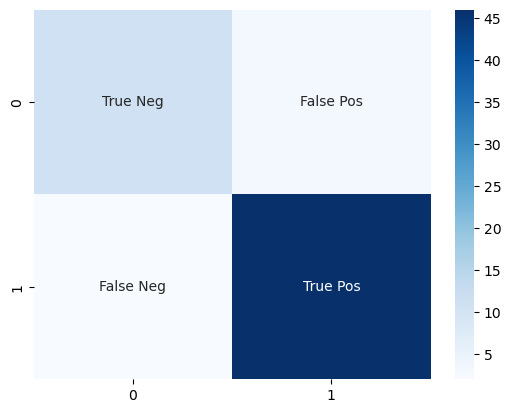

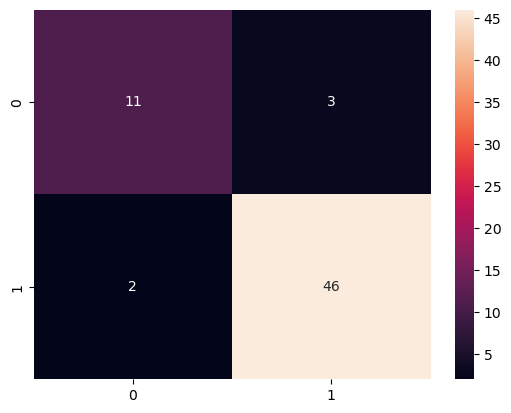

In [342]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [360]:
grid.best_estimator_

Pipeline(steps=[('add_income_col',
                 <__main__.IncomeGenerator object at 0x7ff71b5062b0>),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric_log',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<function log_transformer at 0x7ff719bec4c0>)),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount', 'Income']),
                                                 ('numeric',
                                                  P...
                                                  Pipeline(steps=[('custom_impute',
                                                                   <__main__.CustomImputer object at 0x7ff71c2f0820>),
                                                                  ('one_hot_encode',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['Married', 'Self_Employed',
                                                   'Credit_History',
                                                   'Education'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=0)),
                                                ('select_best',
                                                 SelectKBest(k=3))])),
                ('classifier', RandomForestClassifier())])

In [399]:
### Select K Best Features

col_array = np.array(['LoanAmount', 'Income',  'Loan_Amount_Term',
'Dependents', 'Property_Area', 'Married', 
 'Self_Employed', 'Credit_History', 'Education'])
mask = grid.best_estimator_.named_steps['features'].named_transformers['select_best'].get_support()
col_array[mask]

array(['Married', 'Credit_History', 'Education'], dtype='<U16')

In [361]:
from sklearn.metrics import classification_report
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.85      0.79      0.81        14
           Y       0.94      0.96      0.95        48

    accuracy                           0.92        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.92      0.92      0.92        62



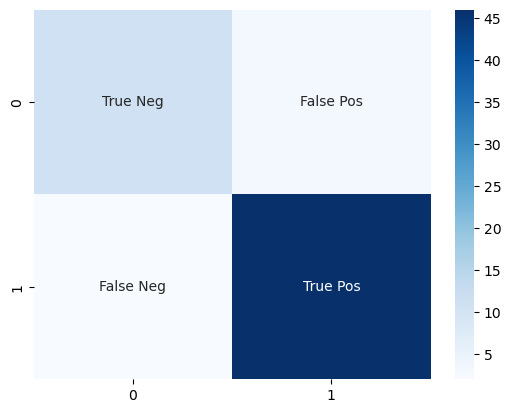

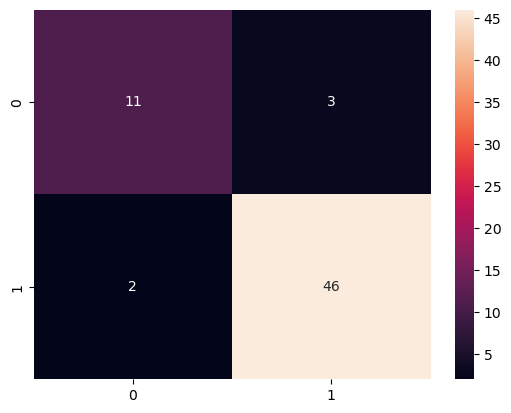

In [362]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

import seaborn as sns
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
plt.show()
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
plt.show()

## Saving the Model

In [452]:
# saving the model
import pickle

model_columns = list(X_train.columns)
pickle.dump(pipe_model, open('../src/model.pkl', 'wb'))
pickle.dump(model_columns, open('../src/columns_list', 'wb'))

pickle.dump(old_df[['Self_Employed', 'ApplicantIncome']], open('../src/df_for_customimputer', 'wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
from flask import Flask, jsonify, request
import flask
import pandas as pd
import numpy 
import pickle

In [ ]:
model = pickle.load(open('../src/model.pkl', 'rb'))
model_columns = pickle.load (open('../src/columns_list', 'rb'))

In [ ]:
# sample row for testing
json_data = [X_test.iloc[0].to_dict()]
pd.DataFrame(json_data).T

In [ ]:
import requests
URL = "http://ec2-3-145-177-87.us-east-2.compute.amazonaws.com:8000/"
# sending get request and saving the response as response object 
r = requests.post(url = URL+'predict', json = json_data) 
print(r.json())

# r = requests.post(url = URL+'probability', json = json_data) 
# print(r.json())

```python
## app.py

# import Flask and jsonify

from flask import Flask, jsonify, request
import flask
import pandas as pd
import numpy as np
import pickle

app = Flask(__name__)

# include user_defined class and functions
from sklearn.preprocessing import FunctionTransformer
def log_transformer(X):
    X_log = np.log(X)
    return X_log
log_transform = FunctionTransformer(log_transformer)

# create a class 
class IncomeGenerator():
    '''add the Incomes''' 
    def __init__(self):
        pass
        
    def fit(self, X=None, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['Income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
        return X
        
        

# import model and columns list    
model = pickle.load(open('model.pkl', 'rb'))
model_columns = pickle.load (open('columns_list', 'rb'))


@app.route('/')
def welcome():
    return "Welcome! Use this Flask App for Bank Loan Prediction"
     
        
@app.route('/predict', methods=['POST', 'GET'])
def predict():
    
    if flask.request.method == 'GET':
        return "Prediction page. Use post with params to get a specific prediction."
        
    if flask.request.method == 'POST':
        try:
            json_ = request.json # 
            print(json_)
            query_ = pd.DataFrame(json_)
            query = query_.reindex(columns = model_columns, fill_value= 0)
            prediction = list(model.predict(query))
            return jsonify({
                "prediction":str(prediction)
            })
        except:
            return jsonify({
                "trace": traceback.format_exc()
            })
            
            
@app.route('/probability', methods=['POST', 'GET'])
def probability():
    
    if flask.request.method == 'GET':
        return "Prediction Probability page. Use post with params to get the specific prediction probabilities."
        
    if flask.request.method == 'POST':
        try:
            json_ = request.json # 
            print(json_)
            query_ = pd.DataFrame(json_)
            query = query_.reindex(columns = model_columns, fill_value= 0)
            N_probability, Y_probability = list(model.predict_proba(query))[0]
            return jsonify({
                "N probability":str(N_probability),
                "Y probability":str(Y_probability)
            })
        except:
            return jsonify({
                "trace": traceback.format_exc()
            })


if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=8000)
    
    
```

In [318]:
tmp = old_df[['Married', 'Dependents']]
tmp['Married'].apply(lambda )

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
